In [1]:
%run Main.ipynb
%run RedshiftDrift.ipynb
%run AlphaVariation.ipynb

# Redshift Drift + Alpha Variation
#### BEK0 ($\zeta_\Lambda = \zeta_m = 0$)
#### BEK ($\zeta_m = 0$ and $\zeta_\Lambda = +0.1$ppm)

In [2]:
#Redshift(h,OmegaM)
BEK_Red_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=None, wa=None, NrYears=20, analysis = 'redshift')
BEK_Red_Liske = add1DPriors(BEK_Red_Liske, [[unch,0],[uncOmegaM,1]])


#Alpha(OmegaM,zetaM,zetaL)
BEK0_AlphaB = BEK0_AlphaB
BEK0_AlphaO = BEK0_AlphaO

BEK_AlphaB = BEK_AlphaB
BEK_AlphaO = BEK_AlphaO


#Redshift+Alpha(h,OmegaM,zetaM,zetaL)
BEK_Redalpha_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=None, wa=None, NrYears=20, analysis = 'redshift+alpha')


##Baseline
BEK0_redAlpha1B = FisherMatrix_ab(zAndes_15baseline, uncAndes_15baseline, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0_redAlpha2B = FisherMatrix_ab(zAndes_10baseline, uncAndes_10baseline, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')

BEK_redAlpha1B = FisherMatrix_ab(zAndes_15baseline, uncAndes_15baseline, OmegaM=0.3, w0=None, wa=None, Zl=0.1, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK_redAlpha2B = FisherMatrix_ab(zAndes_10baseline, uncAndes_10baseline, OmegaM=0.3, w0=None, wa=None, Zl=0.1, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')

BEK0_redAlphaB = BEK0_redAlpha1B + BEK0_redAlpha2B
BEK_redAlphaB = BEK_redAlpha1B + BEK_redAlpha2B

FpriorClocksBEK = np.zeros((7,7))
FpriorClocksBEK[4:6,4:6] += FpriorClocks_Oparam

BEK0_RedAlphaB_Liske = BEK_Redalpha_Liske + BEK0_redAlphaB
BEK0_RedAlphaB_Liske += FpriorClocksBEK
BEK0_RedAlphaB_Liske = add1DPriors(BEK0_RedAlphaB_Liske, [[unch,0],[uncOmegaM,1]])
BEK0_RedAlphaB_Liske = np.delete(BEK0_RedAlphaB_Liske,[2,3,6],0)
BEK0_RedAlphaB_Liske = np.delete(BEK0_RedAlphaB_Liske,[2,3,6],1)

BEK_RedAlphaB_Liske = BEK_Redalpha_Liske + BEK_redAlphaB
BEK_RedAlphaB_Liske += FpriorClocksBEK
BEK_RedAlphaB_Liske = add1DPriors(BEK_RedAlphaB_Liske, [[unch,0],[uncOmegaM,1]])
BEK_RedAlphaB_Liske = np.delete(BEK_RedAlphaB_Liske,[2,3,6],0)
BEK_RedAlphaB_Liske = np.delete(BEK_RedAlphaB_Liske,[2,3,6],1)


##Optimistic
BEK0_redAlpha1O = FisherMatrix_ab(zAndes_20optimistic, uncAndes_20optimistic, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0_redAlpha2O = FisherMatrix_ab(zAndes_15optimistic1, uncAndes_15optimistic1, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0_redAlpha3O = FisherMatrix_ab(zAndes_15optimistic2, uncAndes_15optimistic2, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0_redAlphaO = BEK0_redAlpha1O + BEK0_redAlpha2O + BEK0_redAlpha3O

BEK_redAlpha1O = FisherMatrix_ab(zAndes_20optimistic, uncAndes_20optimistic, OmegaM=0.3, w0=None, wa=None, Zl=0.1, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK_redAlpha2O = FisherMatrix_ab(zAndes_15optimistic1, uncAndes_15optimistic1, OmegaM=0.3, w0=None, wa=None, Zl=0.1, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK_redAlpha3O = FisherMatrix_ab(zAndes_15optimistic2, uncAndes_15optimistic2, OmegaM=0.3, w0=None, wa=None, Zl=0.1, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK_redAlphaO = BEK_redAlpha1O + BEK_redAlpha2O + BEK_redAlpha3O


BEK0_RedAlphaO_Liske = BEK_Redalpha_Liske + BEK0_redAlphaO
BEK0_RedAlphaO_Liske += FpriorClocksBEK
BEK0_RedAlphaO_Liske = add1DPriors(BEK0_RedAlphaO_Liske, [[unch,0],[uncOmegaM,1]])
BEK0_RedAlphaO_Liske = np.delete(BEK0_RedAlphaO_Liske,[2,3,6],0)
BEK0_RedAlphaO_Liske = np.delete(BEK0_RedAlphaO_Liske,[2,3,6],1)


BEK_RedAlphaO_Liske = BEK_Redalpha_Liske + BEK_redAlphaO
BEK_RedAlphaO_Liske += FpriorClocksBEK
BEK_RedAlphaO_Liske = add1DPriors(BEK_RedAlphaO_Liske, [[unch,0],[uncOmegaM,1]])
BEK_RedAlphaO_Liske = np.delete(BEK_RedAlphaO_Liske,[2,3,6],0)
BEK_RedAlphaO_Liske = np.delete(BEK_RedAlphaO_Liske,[2,3,6],1)

#### - Confidence ellipses (1-sigma)

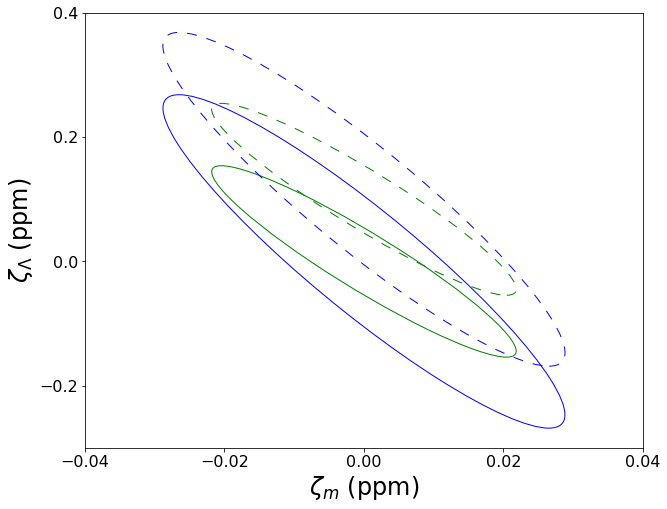

In [3]:
def BEKRedAlphaZlZm(Zl1,Zm1,Zl2,Zm2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK0_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([Zl1,Zm1, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK0_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([Zl1,Zm1, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([Zl2,Zm2, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([Zl2,Zm2, Pa[0],Pa[1],Pa[2],name,color,style])     

    ellipses(ells,['$\zeta_m$ (ppm)','$\zeta_\Lambda$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-0.04,0.04)
    plt.ylim(-0.3,0.4)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=4)
    plt.savefig('BEK_RedAlphaZlZm.png', dpi=300, bbox_inches='tight')
    plt.show()
    
BEKRedAlphaZlZm(0,0,0,0.1,[BEK_RedAlphaO_Liske, BEK0_RedAlphaO_Liske, BEK0_RedAlphaB_Liske, BEK_RedAlphaB_Liske])

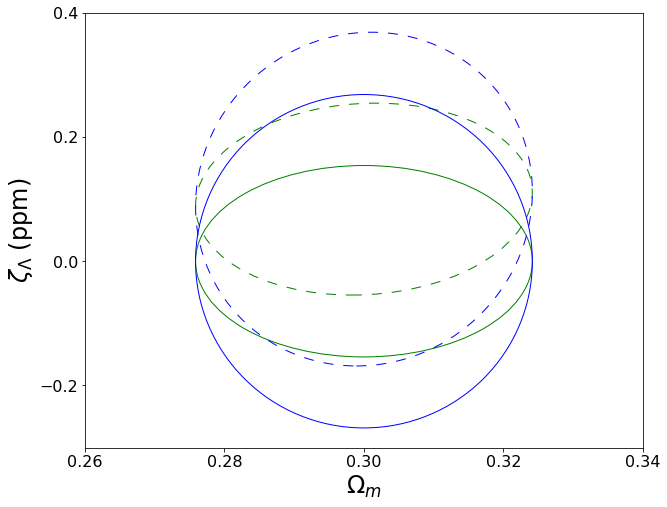

In [4]:
def BEKRedAlphaZlOmegaM(OmegaM,Zl1,Zl2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK0_RedAlphaB_Liske:
            Fm = np.copy(Fs[i])
            
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,Zl1,Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK0_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,Zl1,Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,Zl2,Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,Zl2,Pa[0],Pa[1],Pa[2],name,color,style])

    ellipses(ells,['$\Omega_m$','$\zeta_\Lambda$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.26,0.34)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=4)
    
    plt.ylim(-0.3,0.4)
    plt.savefig('BEK_RedAlphaZlOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()

    
BEKRedAlphaZlOmegaM(0.3,0,0.1,[BEK_RedAlphaO_Liske, BEK0_RedAlphaO_Liske, BEK0_RedAlphaB_Liske, BEK_RedAlphaB_Liske])

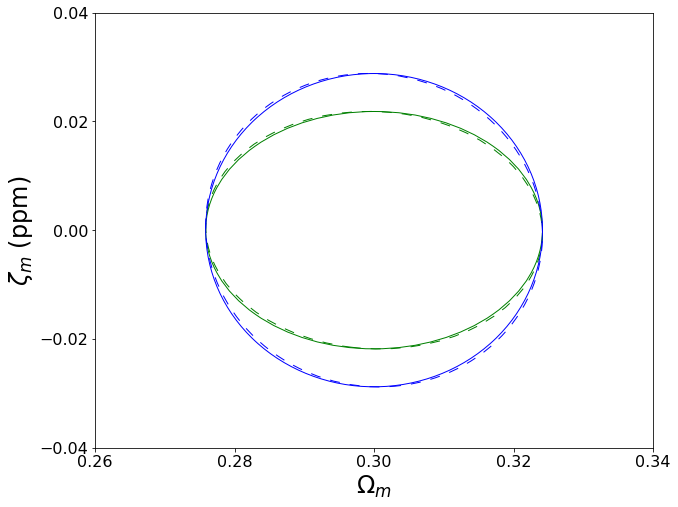

In [5]:
def BEKRedAlphaZmOmegaM(OmegaM,Zm1,Zm2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK0_RedAlphaB_Liske:
            Fm = np.copy(Fs[i])
            
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,Zm1,Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK0_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,Zm1,Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,Zm2,Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is BEK_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,Zm2,Pa[0],Pa[1],Pa[2],name,color,style]) 
            

    ellipses(ells,['$\Omega_m$','$\zeta_m$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.26,0.34)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.ylim(-0.04,0.04)
    plt.savefig('BEK_RedAlphaZmOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()
    

    
BEKRedAlphaZmOmegaM(0.3,0,0,[BEK_RedAlphaO_Liske, BEK0_RedAlphaO_Liske, BEK0_RedAlphaB_Liske, BEK_RedAlphaB_Liske])

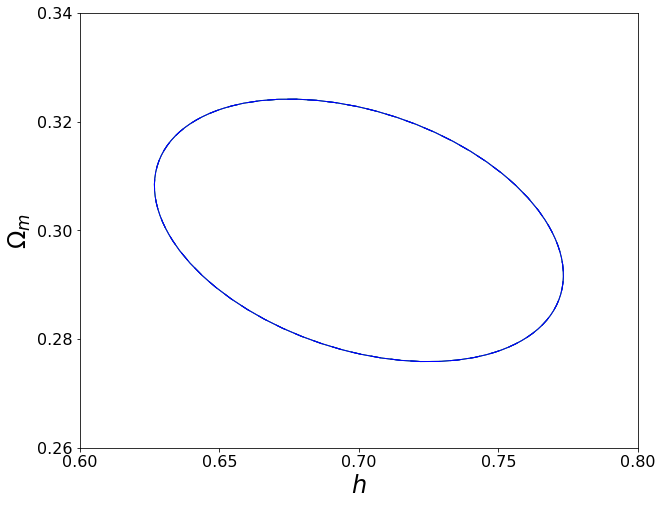

In [6]:
def BEKRedAlphahOmegaM(h,OmegaM,Fs): 
    ells = []
    for i in range(len(Fs)):
        Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
        Fm = marginalize(Fm, 'Zm',analysis='red+alpha-BEK')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle(Fs[i])
        ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$h$','$\Omega_m$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.6,0.8)
    plt.ylim(0.26,0.34)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.savefig('BEK_RedAlphahOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()
    
BEKRedAlphahOmegaM(0.7,0.3,[BEK_RedAlphaO_Liske, BEK0_RedAlphaO_Liske, BEK0_RedAlphaB_Liske, BEK_RedAlphaB_Liske])

#### - Table

In [7]:
def tableRedAlphaBEK(matrices):
    i=0
    df=pd.DataFrame()
    nformat = "{:.0f}"
    float_format="{:.3f}"

    for matrix in matrices:
        if len(matrix) ==4:  #RedshiftDrift+Alpha
            rows = {'FoM(Zm, Zl)': nformat.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zm, Ωm)': nformat.format(FigMeriteRho(matrix,['Zl','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zl, Ωm)': nformat.format(FigMeriteRho(matrix,['Zm','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['Zm','Zl'],analysis='red+alpha-BEK')[0]),
                    'ρ(Zm, Zl)': float_format.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='red+alpha-BEK')[1]),
                    'ρ(Zm, Ωm)': float_format.format(FigMeriteRho(matrix,['Zl','h'],analysis='red+alpha-BEK')[1]),
                    'ρ(Zl, Ωm)': float_format.format(FigMeriteRho(matrix,['Zm','h'],analysis='red+alpha-BEK')[1]),
                    'ρ(Ωm, h)': float_format.format(FigMeriteRho(matrix,['Zm','Zl'],analysis='red+alpha-BEK')[1]),
                    'σ(h)':float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(Zm)':float_format.format(Sigmas(matrix)[2]),
                    'σ(Zl)':float_format.format(Sigmas(matrix)[3])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        if len(matrix)==3:   #Alpha Only
            rows = {'FoM(Zm, Zl)': nformat.format(FigMeriteRho(matrix,['OmegaM'],analysis='alpha-BEK')[0]),
                'FoM(Zm, Ωm)': nformat.format(FigMeriteRho(matrix,['Zl'],analysis='alpha-BEK')[0]),
                'FoM(Zl, Ωm)': nformat.format(FigMeriteRho(matrix,['Zm'],analysis='alpha-BEK')[0]),
                'FoM(Ωm, h)': '-',
                'ρ(Zm, Zl)': float_format.format(FigMeriteRho(matrix,['OmegaM'],analysis='alpha-BEK')[1]),
                'ρ(Zm, Ωm)': float_format.format(FigMeriteRho(matrix,['Zl'],analysis='alpha-BEK')[1]),
                'ρ(Zl, Ωm)': float_format.format(FigMeriteRho(matrix,['Zm'],analysis='alpha-BEK')[1]),
                'ρ(Ωm, h)': '-',
                'σ(h)': '-',
                'σ(Ωm)':float_format.format(Sigmas(matrix)[0]),
                'σ(Zm)':float_format.format(Sigmas(matrix)[1]),
                'σ(Zl)':float_format.format(Sigmas(matrix)[2])}
            i+=1
        
            df = df.append(rows,ignore_index=True)
            del rows
            
        if len(matrix) == 2:  #RedshiftDrift Only
            rows = {'FoM(Zm, Zl)': '-',
                'FoM(Zm, Ωm)': '-',
                'FoM(Zl, Ωm)': '-',
                'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,[],analysis='redshift')[0]),
                'ρ(Zm, Zl)': '-',
                'ρ(Zm, Ωm)': '-',
                'ρ(Zl, Ωm)': '-',
                'ρ(Ωm, h)': float_format.format(FigMeriteRho(matrix,[],analysis='redshift')[1]),
                'σ(h)': float_format.format(Sigmas(matrix)[0]),
                'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                'σ(Zm)':'-',
                'σ(Zl)':'-'}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
    
    Datasets = ['Liske','Baseline', 'Optimistic', 'Liske + Baseline','Liske + Optimistic']
    df.insert(0, "Parameters", Datasets, True)
    df = df.transpose()
          
    return df

In [8]:
matricesRedAlphaBEK = [BEK_Red_Liske, BEK_AlphaB, BEK_AlphaO, BEK_RedAlphaB_Liske, BEK_RedAlphaO_Liske]
tab1 = tableRedAlphaBEK(matricesRedAlphaBEK)

#See the table in DataFrame:
tab1

#Transform dataframe to latex code:
#print(tab1.to_latex(header=False,index=True))

,0,1,2,3,4
Parameters,Liske,Baseline,Optimistic,Liske + Baseline,Liske + Optimistic
"FoM(Zm, Zl)",-,329,829,330,844
"FoM(Zm, Ωm)",-,765,1010,1444,1906
"FoM(Zl, Ωm)",-,82,143,155,270
"FoM(Ωm, h)",604,-,-,604,604
"ρ(Zm, Zl)",-,-0.920,-0.934,-0.920,-0.936
"ρ(Zm, Ωm)",-,-0.057,-0.060,-0.030,-0.032
"ρ(Zl, Ωm)",-,0.083,0.132,0.044,0.071
"ρ(Ωm, h)",-0.340,-,-,-0.340,-0.340
σ(h),0.048,-,-,0.048,0.048


#### CPLT ($w_0 = -0.8$, $w_a = -0.2$ and $\zeta = -0.15$ppm)
#### CPLF ($w_0 = -0.9$, $w_a = +0.3$ and $\zeta = -0.15$ppm)

In [9]:
#Redshift(h,OmegaM,w0,wa) - Liske
CPL_Red_LiskeT = CPLT_Liske
CPL_Red_LiskeF = CPLF_Liske

#Alpha(OmegaM,w0,wa,zeta)
CPL_AlphaB_T = CPL_AlphaB_T
CPL_AlphaO_T = CPL_AlphaO_T

CPL_AlphaB_F = CPL_AlphaB_F
CPL_AlphaO_F = CPL_AlphaO_F


#Redshift+Alpha(h,OmegaM,w0,wa,zeta)
CPL_Redalpha_LiskeT = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=-0.8, wa=-0.2, NrYears=20, analysis = 'redshift+alpha')
CPL_Redalpha_LiskeF = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=-0.9, wa=0.3, NrYears=20, analysis = 'redshift+alpha')


##Baseline
CPL_redAlpha1BT = FisherMatrix_aCPL(zAndes_15baseline, uncAndes_15baseline, OmegaM=0.3, w0=-0.8, wa=-0.2, zeta=-0.15, analysis = 'redshift+alpha')
CPL_redAlpha2BT = FisherMatrix_aCPL(zAndes_10baseline, uncAndes_10baseline, OmegaM=0.3, w0=-0.8, wa=-0.2, zeta=-0.15, analysis = 'redshift+alpha')

CPL_redAlpha1BF = FisherMatrix_aCPL(zAndes_15baseline, uncAndes_15baseline, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.15, analysis = 'redshift+alpha')
CPL_redAlpha2BF = FisherMatrix_aCPL(zAndes_10baseline, uncAndes_10baseline, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.15, analysis = 'redshift+alpha')

CPL_redAlphaBT = CPL_redAlpha1BT + CPL_redAlpha2BT
CPL_redAlphaBF = CPL_redAlpha1BF + CPL_redAlpha2BF

CPL_RedAlphaB_LiskeT = CPL_Redalpha_LiskeT + CPL_redAlphaBT
CPL_RedAlphaB_LiskeT = add1DPriors(CPL_RedAlphaB_LiskeT, [[unch,0],[uncOmegaM,1],[uncw0,2],[uncwa,3],[FpriorClocks_OparamCPLT,6]])
CPL_RedAlphaB_LiskeT = np.delete(CPL_RedAlphaB_LiskeT,[4,5],0)
CPL_RedAlphaB_LiskeT = np.delete(CPL_RedAlphaB_LiskeT,[4,5],1)

CPL_RedAlphaB_LiskeF = CPL_Redalpha_LiskeF + CPL_redAlphaBF
CPL_RedAlphaB_LiskeF = add1DPriors(CPL_RedAlphaB_LiskeF, [[unch,0],[uncOmegaM,1],[uncw0,2],[uncwa,3],[FpriorClocks_OparamCPLF,6]])
CPL_RedAlphaB_LiskeF = np.delete(CPL_RedAlphaB_LiskeF,[4,5],0)
CPL_RedAlphaB_LiskeF = np.delete(CPL_RedAlphaB_LiskeF,[4,5],1)



##Optimistic
CPL_redAlpha1OT = FisherMatrix_aCPL(zAndes_20optimistic, uncAndes_20optimistic, OmegaM=0.3, w0=-0.8, wa=-0.2, zeta=-0.15, analysis = 'redshift+alpha')
CPL_redAlpha2OT = FisherMatrix_aCPL(zAndes_15optimistic1, uncAndes_15optimistic1, OmegaM=0.3, w0=-0.8, wa=-0.2, zeta=-0.15, analysis = 'redshift+alpha')
CPL_redAlpha3OT = FisherMatrix_aCPL(zAndes_15optimistic2, uncAndes_15optimistic2, OmegaM=0.3, w0=-0.8, wa=-0.2, zeta=-0.15, analysis = 'redshift+alpha')

CPL_redAlpha1OF = FisherMatrix_aCPL(zAndes_20optimistic, uncAndes_20optimistic, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.15, analysis = 'redshift+alpha')
CPL_redAlpha2OF = FisherMatrix_aCPL(zAndes_15optimistic1, uncAndes_15optimistic1, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.15, analysis = 'redshift+alpha')
CPL_redAlpha3OF = FisherMatrix_aCPL(zAndes_15optimistic2, uncAndes_15optimistic2, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.15, analysis = 'redshift+alpha')


CPL_redAlphaOT = CPL_redAlpha1OT + CPL_redAlpha2OT + CPL_redAlpha3OT
CPL_redAlphaOF = CPL_redAlpha1OF + CPL_redAlpha2OF + CPL_redAlpha3OF


CPL_RedAlphaO_LiskeT = CPL_Redalpha_LiskeT + CPL_redAlphaOT
CPL_RedAlphaO_LiskeT = add1DPriors(CPL_RedAlphaO_LiskeT, [[unch,0],[uncOmegaM,1],[uncw0,2],[uncwa,3],[FpriorClocks_OparamCPLT,6]])
CPL_RedAlphaO_LiskeT = np.delete(CPL_RedAlphaO_LiskeT,[4,5],0)
CPL_RedAlphaO_LiskeT = np.delete(CPL_RedAlphaO_LiskeT,[4,5],1)

CPL_RedAlphaO_LiskeF = CPL_Redalpha_LiskeF + CPL_redAlphaOF
CPL_RedAlphaO_LiskeF = add1DPriors(CPL_RedAlphaO_LiskeF, [[unch,0],[uncOmegaM,1],[uncw0,2],[uncwa,3],[FpriorClocks_OparamCPLF,6]])
CPL_RedAlphaO_LiskeF = np.delete(CPL_RedAlphaO_LiskeF,[4,5],0)
CPL_RedAlphaO_LiskeF = np.delete(CPL_RedAlphaO_LiskeF,[4,5],1)

#### - Confidence ellipses (1-sigma)

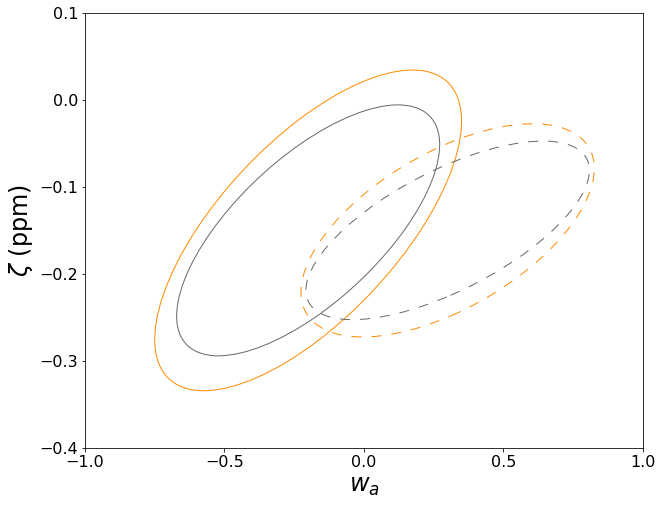

In [10]:
def CPLRedAlphazetawa(wa1,wa2,zeta1,zeta2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([wa1,zeta1, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([wa1,zeta1, Pa[0],Pa[1],Pa[2],name,color,style])  
            
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([wa2,zeta2, Pa[0],Pa[1],Pa[2],name,color,style])   
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([wa2,zeta2, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$w_a$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-1,1)
    plt.ylim(-0.4,0.1)
    plt.locator_params(axis="x", nbins=6)
    plt.savefig('CPL_RedAlphaZetaWa.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphazetawa(-0.2,0.3,-0.15,-0.15, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF])    

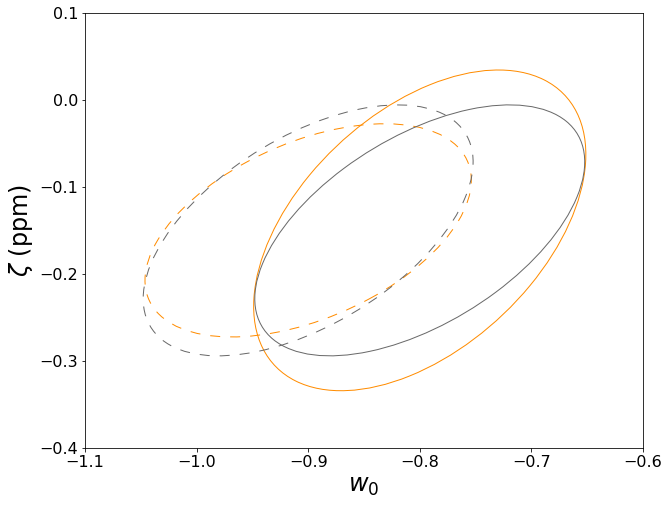

In [11]:
def CPLRedAlphazetaw0(w01,w02,zeta1,zeta2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([w01,zeta1, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([w01,zeta1, Pa[0],Pa[1],Pa[2],name,color,style])  
        
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([w02,zeta2, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            color,name,style = colornamestyle(Fs[i])
            ells.append([w02,zeta2, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$w_0$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-1.1,-0.6)
    plt.ylim(-0.4,0.10)
    plt.savefig('CPL_RedAlphaZetaW0.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphazetaw0(-0.8,-0.9,-0.15,-0.15, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF])    

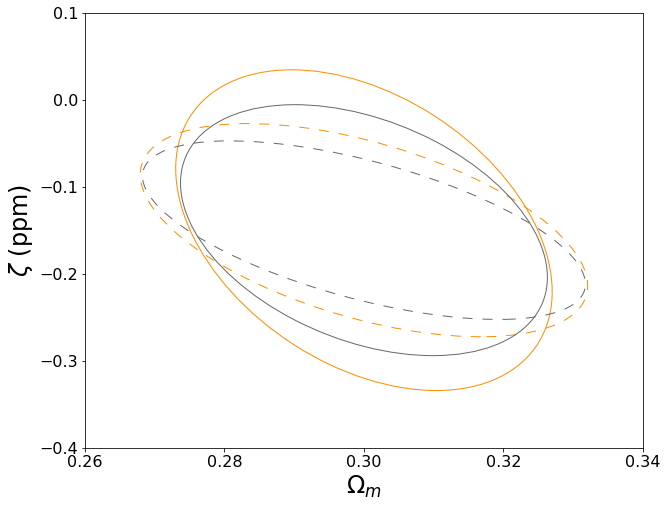

In [12]:
def CPLRedAlphazetaOmegaM(OmegaM,zeta1,zeta2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,zeta1, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,zeta1, Pa[0],Pa[1],Pa[2],name,color,style])  
            
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,zeta2, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,zeta2, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$\Omega_m$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.locator_params(axis="x", nbins=8)
    plt.xlim(0.26,0.34)
    plt.ylim(-0.4,0.1)
    plt.savefig('CPL_RedAlphaZetaOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphazetaOmegaM(0.3,-0.15,-0.15, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF])    

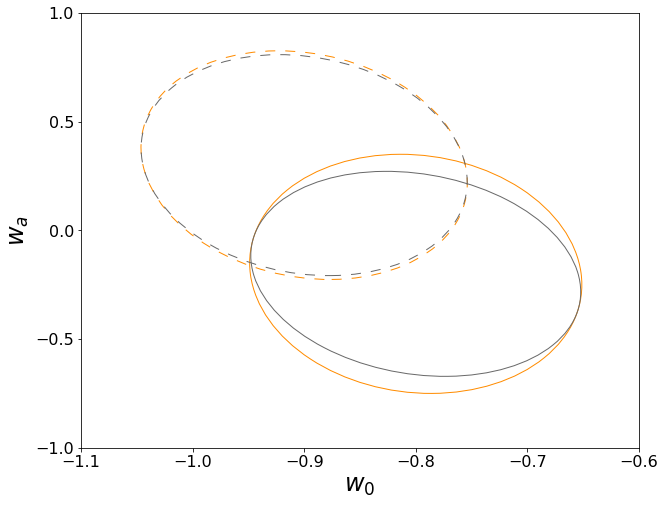

In [13]:
def CPLRedAlphaw0wa(w01,w02,wa1,wa2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            #print(Fs)
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([w01,wa1, Pa[0],Pa[1],Pa[2],name,color,style])
             
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([w01,wa1, Pa[0],Pa[1],Pa[2],name,color,style])
        
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([w02,wa2, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([w02,wa2, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$w_0$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-1.1,-0.6)
    plt.ylim(-1,1)
    plt.locator_params(axis="y", nbins=6)
    plt.savefig('CPL_RedAlphaw0wa.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphaw0wa(-0.8,-0.9,-0.2,0.3, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF])    

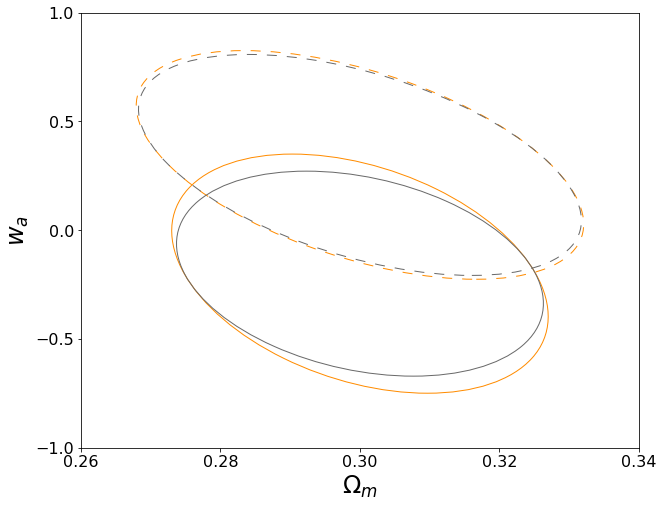

In [14]:
def CPLRedAlphaOmegaMwa(OmegaM,wa1,wa2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,wa1, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,wa1, Pa[0],Pa[1],Pa[2],name,color,style])  
            
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,wa2, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,wa2, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$\Omega_m$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.26,0.34)
    plt.ylim(-1,1)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.savefig('CPL_RedAlphaOmegaMWa.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphaOmegaMwa(0.3,-0.2,0.3, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF]) 

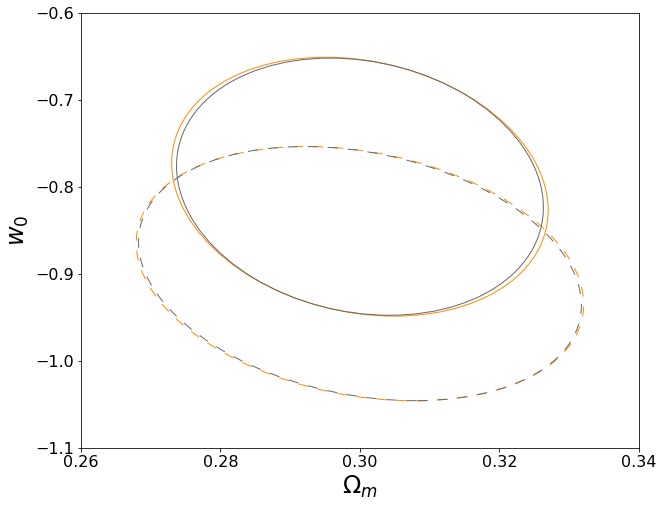

In [15]:
def CPLRedAlphaOmegaMw0(OmegaM,w01,w02,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,w01, Pa[0],Pa[1],Pa[2],name,color,style])
            
            
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,w01, Pa[0],Pa[1],Pa[2],name,color,style])  
            
        
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,w02, Pa[0],Pa[1],Pa[2],name,color,style])
            
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([OmegaM,w02, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$\Omega_m$','$w_0$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.26,0.34)
    plt.ylim(-1.1,-0.6)
    plt.locator_params(axis="x", nbins=6)
    plt.savefig('CPL_RedAlphaOmegaMW0.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphaOmegaMw0(0.3,-0.8,-0.9, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF]) 

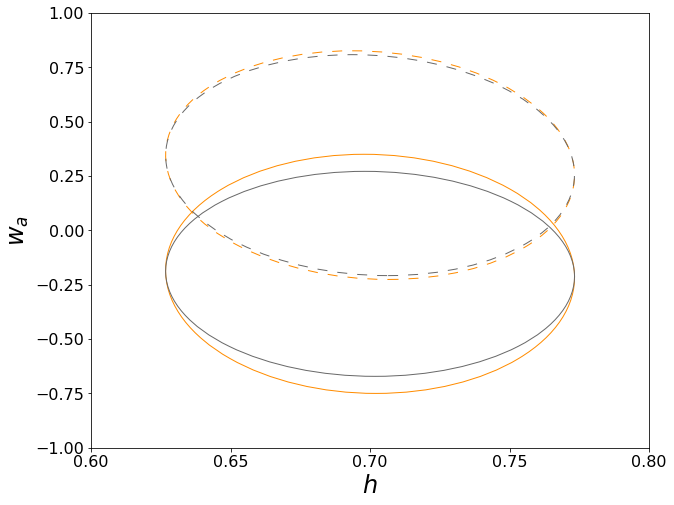

In [16]:
def CPLRedAlphahwa(h,wa1,wa2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,wa1, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,wa1, Pa[0],Pa[1],Pa[2],name,color,style])  
            
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,wa2, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,wa2, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$h$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.6,0.8)
    plt.ylim(-1,1)
    plt.locator_params(axis="x", nbins=6)
    plt.savefig('CPL_RedAlphaHWa.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphahwa(0.7,-0.2,0.3, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF]) 

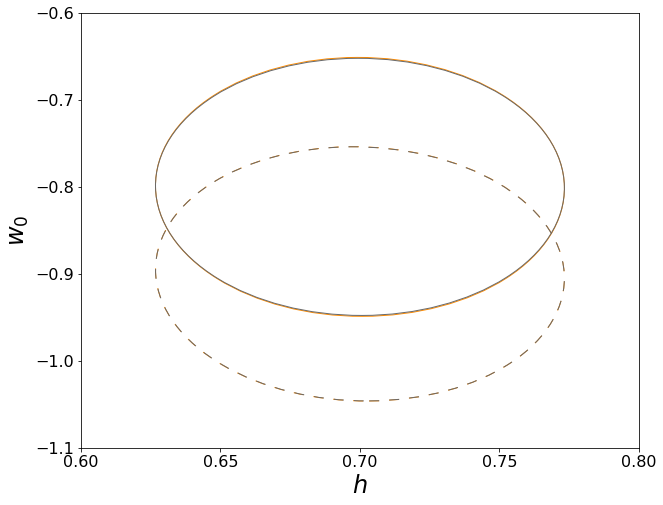

In [17]:
def CPLRedAlphahw0(h,w01,w02,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,w01, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,w01, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,w02, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,w02, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$h$','$w_0$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.6,0.8)
    plt.ylim(-1.1,-0.6)
    plt.locator_params(axis="x", nbins=6)
    plt.savefig('CPL_RedAlphaHW0.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphahw0(0.7,-0.8,-0.9, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF]) 

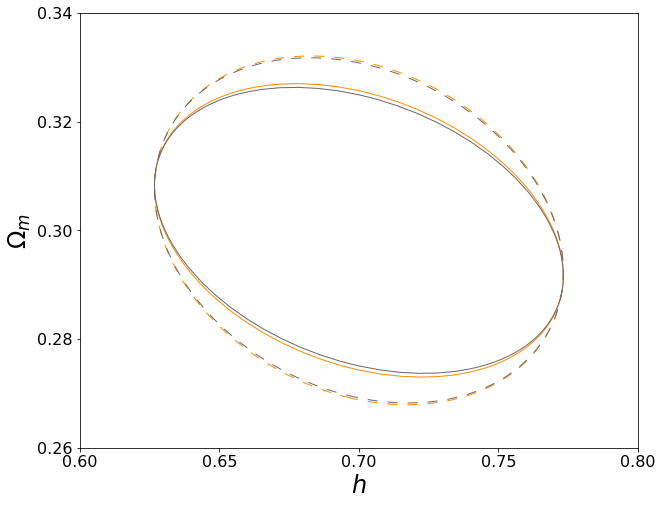

In [18]:
def CPLRedAlphahOmegaM(h,OmegaM,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaB_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style])
            
        if Fs[i] is CPL_RedAlphaO_LiskeF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style = colornamestyle(Fs[i])
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style])
    
    ellipses(ells,['$h$','$\Omega_m$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.6,0.8)
    plt.ylim(0.26,0.34)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.savefig('CPL_RedAlphaHOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()

    
CPLRedAlphahOmegaM(0.7,0.3, [CPL_RedAlphaB_LiskeT, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeT, CPL_RedAlphaO_LiskeF]) 

#### - Table

In [19]:
def tableRedAlphaCPL(matrices):
    i=0
    df=pd.DataFrame()
    nformat = "{:.0f}"
    float_format="{:.3f}"

    for matrix in matrices:
        if matrix.all == CPL_RedAlphaB_LiskeF.all or matrix.all == CPL_RedAlphaO_LiskeF.all:
            rows = {'FoM(zeta, wa)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, w0)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','w0','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['zeta','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','w0','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','wa','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, h)': nformat.format(FigMeriteRho(matrix,['zeta','w0','OmegaM'],analysis='red+alpha-CPL')[0]),
                    'FoM(w0, h)': nformat.format(FigMeriteRho(matrix,['zeta','wa','OmegaM'],analysis='red+alpha-CPL')[0]),
                    'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['zeta','wa','w0'],analysis='red+alpha-CPL')[0]),
                    'ρ(zeta, wa)': float_format.format(FigMeriteRho(matrix,['w0','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(zeta, w0)': float_format.format(FigMeriteRho(matrix,['wa','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(zeta, Ωm)': float_format.format(FigMeriteRho(matrix,['wa','w0','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(wa, w0)': float_format.format(FigMeriteRho(matrix,['zeta','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(wa, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','w0','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(w0, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','wa','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(wa, h)': float_format.format(FigMeriteRho(matrix,['zeta','w0','OmegaM'],analysis='red+alpha-CPL')[1]),
                    'ρ(w0, h)': float_format.format(FigMeriteRho(matrix,['zeta','wa','OmegaM'],analysis='red+alpha-CPL')[1]),
                    'ρ(Ωm, h)': float_format.format(FigMeriteRho(matrix,['zeta','wa','w0'],analysis='red+alpha-CPL')[1]),
                    'σ(h)':float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(w0)':float_format.format(Sigmas(matrix)[2]),
                    'σ(wa)':float_format.format(Sigmas(matrix)[3]),
                    'σ(zeta)':float_format.format(Sigmas(matrix)[4])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        if matrix.all == CPL_AlphaB_F.all or matrix.all == CPL_AlphaO_F.all:
            rows = {'FoM(zeta, wa)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM'],analysis='alpha-CPL')[0]),
                'FoM(zeta, w0)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM'],analysis='alpha-CPL')[0]),
                'FoM(zeta, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','w0'],analysis='alpha-CPL')[0]),
                'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['zeta','OmegaM'],analysis='alpha-CPL')[0]),
                'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','w0'],analysis='alpha-CPL')[0]),
                'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','wa'],analysis='alpha-CPL')[0]),
                'FoM(wa, h)': '-',
                'FoM(w0, h)': '-',
                'FoM(Ωm, h)': '-',
                'ρ(zeta, wa)': float_format.format(FigMeriteRho(matrix,['w0','OmegaM'],analysis='alpha-CPL')[1]),
                'ρ(zeta, w0)': float_format.format(FigMeriteRho(matrix,['wa','OmegaM'],analysis='alpha-CPL')[1]),
                'ρ(zeta, Ωm)': float_format.format(FigMeriteRho(matrix,['wa','w0'],analysis='alpha-CPL')[1]),
                'ρ(wa, w0)': float_format.format(FigMeriteRho(matrix,['zeta','OmegaM'],analysis='alpha-CPL')[1]),
                'ρ(wa, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','w0'],analysis='alpha-CPL')[1]),
                'ρ(w0, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','wa'],analysis='alpha-CPL')[1]),
                'ρ(wa, h)': '-',
                'ρ(w0, h)': '-',
                'ρ(Ωm, h)': '-',
                'σ(h)': '-',
                'σ(Ωm)':float_format.format(Sigmas(matrix)[0]),
                'σ(w0)':float_format.format(Sigmas(matrix)[1]),
                'σ(wa)':float_format.format(Sigmas(matrix)[2]),
                'σ(zeta)':float_format.format(Sigmas(matrix)[3])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        if matrix.all == CPL_Red_LiskeF.all:
            rows = {'FoM(zeta, wa)': '-',
                'FoM(zeta, w0)': '-',
                'FoM(zeta, Ωm)': '-',
                'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='redshift')[0]),
                'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['w0','h'],analysis='redshift')[0]),
                'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','h'],analysis='redshift')[0]),
                'FoM(wa, h)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM'],analysis='redshift')[0]),
                'FoM(w0, h)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM'],analysis='redshift')[0]),
                'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['wa','w0'],analysis='redshift')[0]),
                'ρ(zeta, wa)': '-',
                'ρ(zeta, w0)': '-',
                'ρ(zeta, Ωm)': '-',
                'ρ(wa, w0)': float_format.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='redshift')[1]),
                'ρ(wa, Ωm)': float_format.format(FigMeriteRho(matrix,['w0','h'],analysis='redshift')[1]),
                'ρ(w0, Ωm)': float_format.format(FigMeriteRho(matrix,['wa','h'],analysis='redshift')[1]),
                'ρ(wa, h)': float_format.format(FigMeriteRho(matrix,['w0','OmegaM'],analysis='redshift')[1]),
                'ρ(w0, h)': float_format.format(FigMeriteRho(matrix,['wa','OmegaM'],analysis='redshift')[1]),
                'ρ(Ωm, h)': float_format.format(FigMeriteRho(matrix,['wa','w0'],analysis='redshift')[1]),
                'σ(h)': float_format.format(Sigmas(matrix)[0]),
                'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                'σ(w0)':float_format.format(Sigmas(matrix)[2]),
                'σ(wa)':float_format.format(Sigmas(matrix)[3]),
                'σ(zeta)':'-'}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
    
    Datasets = ['Liske','Baseline', 'Optimistic','Liske + Baseline','Liske + Optimistic']
    df.insert(0, "Parameters", Datasets, True)
    df = df.transpose()
    
            
    return df

In [20]:
matricesRedAlphaCPL = [CPL_Red_LiskeF, CPL_AlphaB_F, CPL_AlphaO_F, CPL_RedAlphaB_LiskeF, CPL_RedAlphaO_LiskeF]

tab1 = tableRedAlphaCPL(matricesRedAlphaCPL)

#See the table in DataFrame:
tab1

#Transform dataframe to latex code:
#print(tab1.to_latex(header=False,index=True))

,0,1,2,3,4
Parameters,Liske,Baseline,Optimistic,Liske + Baseline,Liske + Optimistic
"FoM(zeta, wa)",-,16,22,19,26
"FoM(zeta, w0)",-,57,72,64,81
"FoM(zeta, Ωm)",-,164,191,299,387
"FoM(wa, w0)",13,11,11,13,14
"FoM(wa, Ωm)",69,37,38,70,72
"FoM(w0, Ωm)",220,145,145,221,224
"FoM(wa, h)",26,-,-,26,27
"FoM(w0, h)",94,-,-,94,94
"FoM(Ωm, h)",439,-,-,440,445
